## Matched frame then convert to video with extra 50 frames

In [98]:
import os
import json
from collections import Counter
import cv2

# Load the JSON file containing image data
with open('image_frames_full.json', 'r') as file:
    image_data = json.load(file)

# Function to retrieve frames based on text query and store them in a different path
def retrieve_and_store_video_clips(query, destination_path):
    matching_frames = []
    frequency_counter = Counter()  # Counter to track the frequency of query words in captions

    # Count the frequency of query words in captions
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption:
            words = caption.lower().split()
            frequency_counter.update(words)

    # Sort the matching frames based on the frequency count
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption and query.lower() in caption.lower():
            frame_path = image_info.get('folder_path') + '\\' + f"frame_{str(image_info.get('frame_id')).zfill(4)}.jpg"
            matching_frames.append(frame_path)

    matching_frames.sort(key=lambda frame: sum(frequency_counter[word] for word in query.lower().split()))

    # Create the destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # Iterate through each image and select additional 50 frames
    for image_path in matching_frames:
        image_name = os.path.basename(image_path)
        image_folder = os.path.dirname(image_path)
        image_frames = [image_path]  # Start with the original frame

        # Add 50 more frames from the same image folder
        image_frame_index = int(image_name.split('_')[-1].split('.')[0])  # Get the frame index from the image name
        additional_frames = range(image_frame_index + 1, image_frame_index + 50)
        for frame_index in additional_frames:
            frame_name = f"frame_{str(frame_index).zfill(4)}.jpg"
            frame_path = os.path.join(image_folder, frame_name)
            if os.path.exists(frame_path):
                image_frames.append(frame_path)

        # Create a video clip from the selected frames
        video_clip_path = os.path.join(destination_path, f"video_clip_{image_name.split('.')[0]}.mp4")
        create_video_clip(image_frames, video_clip_path)

    return destination_path

# Function to create a video clip from frames
def create_video_clip(frames, output_path):
    # Read the first frame to get its dimensions
    first_frame = cv2.imread(frames[0])
    frame_height, frame_width, _ = first_frame.shape

    # Create a VideoWriter object to save the frames as a video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec (use appropriate codec for the desired output format)
    video_writer = cv2.VideoWriter(output_path, fourcc, 25.0, (frame_width, frame_height))

    # Write each frame to the video
    for frame_path in frames:
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    # Release the VideoWriter and close the video file
    video_writer.release()



In [102]:
# Example usage:
query = "a man in a band playing drums on stage"  # Example query, can be a partial match
destination_folder = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\Output Videos"  # Specify the destination folder path
retrieve_and_store_video_clips(query, destination_folder)
print("Video clips generated and stored in:", destination_folder)


Video clips generated and stored in: C:\Users\admin\Desktop\SCET_Major\frmes to json\Output Videos


In [103]:
query = "a collage of photos of a woman with a computer"  # Example query, can be a partial match
destination_folder = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\db1"  # Specify the destination folder path
retrieve_and_store_video_clips(query, destination_folder)
print("Video clips generated and stored in:", destination_folder)

Video clips generated and stored in: C:\Users\admin\Desktop\SCET_Major\frmes to json\db1


In [104]:
query = "men in military uniforms standing next to each other"  # Example query, can be a partial match
destination_folder = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\db2"  # Specify the destination folder path
retrieve_and_store_video_clips(query, destination_folder)
print("Video clips generated and stored in:", destination_folder)

Video clips generated and stored in: C:\Users\admin\Desktop\SCET_Major\frmes to json\db2


//CONFUISON MATRIX




In [86]:
import os
import json
from collections import Counter
import cv2
from sklearn.metrics import confusion_matrix

# Load the JSON file containing image data
with open('image_frames_full.json', 'r') as file:
    image_data = json.load(file)

# Function to retrieve frames based on text query and store them in a different path
def retrieve_and_store_video_clips(query, destination_path, ground_truth_labels, predicted_labels):
    matching_frames = []
    frequency_counter = Counter()  # Counter to track the frequency of query words in captions

    # Count the frequency of query words in captions
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption:
            words = caption.lower().split()
            frequency_counter.update(words)

    # Sort the matching frames based on the frequency count
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption and query.lower() in caption.lower():
            frame_path = image_info.get('folder_path') + '\\' + f"frame_{str(image_info.get('frame_id')).zfill(4)}.jpg"
            matching_frames.append(frame_path)

    matching_frames.sort(key=lambda frame: sum(frequency_counter[word] for word in query.lower().split()))

    # Create the destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # Iterate through each image and select additional 20 frames
    for image_path, pred_label in zip(matching_frames, predicted_labels):
        image_name = os.path.basename(image_path)
        image_folder = os.path.dirname(image_path)
        image_frames = [image_path]  # Start with the original frame

        # Add 50 more frames from the same image folder
        image_frame_index = int(image_name.split('_')[-1].split('.')[0])  # Get the frame index from the image name
        additional_frames = range(image_frame_index + 1, image_frame_index + 50)
        for frame_index in additional_frames:
            frame_name = f"frame_{str(frame_index).zfill(4)}.jpg"
            frame_path = os.path.join(image_folder, frame_name)
            if os.path.exists(frame_path):
                image_frames.append(frame_path)

        # Create a video clip from the selected frames
        video_clip_path = os.path.join(destination_path, f"video_clip_{image_name.split('.')[0]}.mp4")
        create_video_clip(image_frames, video_clip_path)

    # Compute confusion matrix
    confusion_mat = confusion_matrix(ground_truth_labels, predicted_labels)
    print("Confusion Matrix:")
    print(confusion_mat)

    return destination_path

# Function to create a video clip from frames
def create_video_clip(frames, output_path):
    # Read the first frame to get its dimensions
    first_frame = cv2.imread(frames[0])
    frame_height, frame_width, _ = first_frame.shape

    # Create a VideoWriter object to save the frames as a video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec (use appropriate codec for the desired output format)
    video_writer = cv2.VideoWriter(output_path, fourcc, 25.0, (frame_width, frame_height))

    # Write each frame to the video
    for frame_path in frames:
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    # Release the VideoWriter and close the video file
    video_writer.release()


# Example usage:
query = "a man in a band playing drums on stage"  # Example query, can be a partial match
destination_folder = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\Output Videos"  # Specify the destination folder path
ground_truth_labels = ['label1', 'label2', 'label3']  # Replace with your actual ground truth labels
predicted_labels = ['frame_path', 'frame_id', 'caption']  # Replace with your actual predicted labels
retrieve_and_store_video_clips(query, destination_folder, ground_truth_labels, predicted_labels)
print("Video clips generated and stored in:", destination_folder)


Confusion Matrix:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]]
Video clips generated and stored in: C:\Users\admin\Desktop\SCET_Major\frmes to json\Output Videos


Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


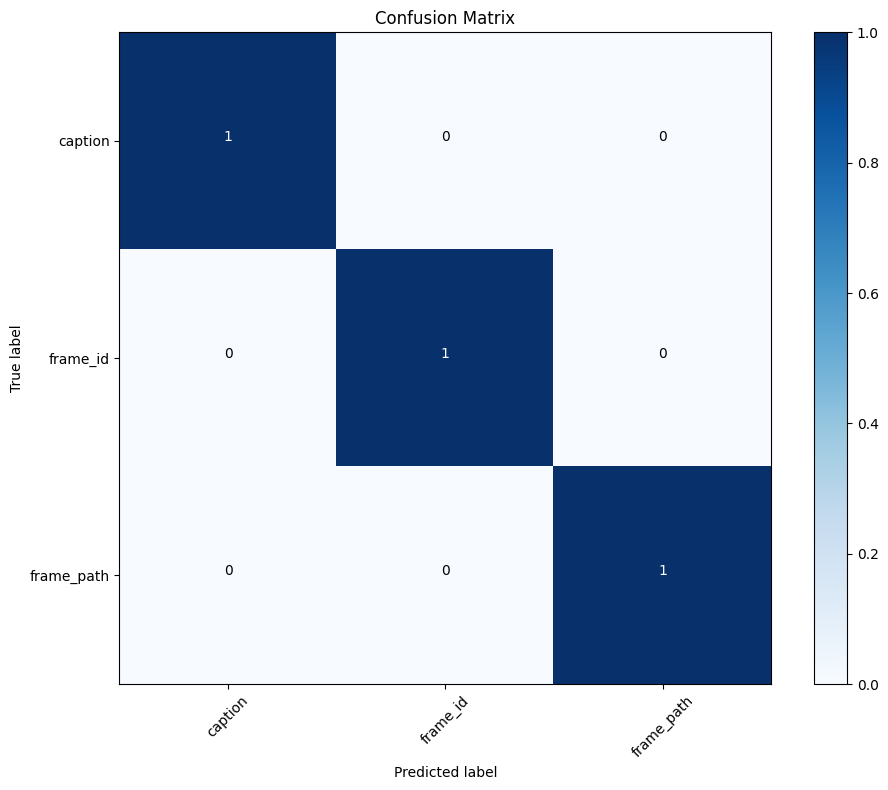

Video clips generated and stored in: C:\Users\admin\Desktop\SCET_Major\frmes to json\Output Videos


In [93]:
import os
import json
from collections import Counter
import cv2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools


# Load the JSON file containing image data
with open('image_frames_full.json', 'r') as file:
    image_data = json.load(file)

# Function to retrieve frames based on text query and store them in a different path
def retrieve_and_store_video_clips(query, destination_path, ground_truth_labels, predicted_labels):
    matching_frames = []
    frequency_counter = Counter()  # Counter to track the frequency of query words in captions

    # Count the frequency of query words in captions
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption:
            words = caption.lower().split()
            frequency_counter.update(words)

    # Sort the matching frames based on the frequency count
    for image_info in image_data:
        caption = image_info.get('caption')
        if caption and query.lower() in caption.lower():
            frame_path = image_info.get('folder_path') + '\\' + f"frame_{str(image_info.get('frame_id')).zfill(4)}.jpg"
            matching_frames.append(frame_path)

    matching_frames.sort(key=lambda frame: sum(frequency_counter[word] for word in query.lower().split()))

    # Create the destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # Iterate through each image and select additional 20 frames
    for image_path, pred_label in zip(matching_frames, predicted_labels):
        image_name = os.path.basename(image_path)
        image_folder = os.path.dirname(image_path)
        image_frames = [image_path]  # Start with the original frame

        # Add 50 more frames from the same image folder
        image_frame_index = int(image_name.split('_')[-1].split('.')[0])  # Get the frame index from the image name
        additional_frames = range(image_frame_index + 1, image_frame_index + 50)
        for frame_index in additional_frames:
            frame_name = f"frame_{str(frame_index).zfill(4)}.jpg"
            frame_path = os.path.join(image_folder, frame_name)
            if os.path.exists(frame_path):
                image_frames.append(frame_path)

        # Create a video clip from the selected frames
        video_clip_path = os.path.join(destination_path, f"video_clip_{image_name.split('.')[0]}.mp4")
        create_video_clip(image_frames, video_clip_path)

    # Compute confusion matrix
    confusion_mat = confusion_matrix(ground_truth_labels, predicted_labels)
    print("Confusion Matrix:")
    print(confusion_mat)

    # Plot confusion matrix as a graph
    classes = np.unique(ground_truth_labels + predicted_labels)
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_mat.max() / 2.
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    return destination_path

# Function to create a video clip from frames
def create_video_clip(frames, output_path):
    # Read the first frame to get its dimensions
    first_frame = cv2.imread(frames[0])
    frame_height, frame_width, _ = first_frame.shape

    # Create a VideoWriter object to save the frames as a video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec (use appropriate codec for the desired output format)
    video_writer = cv2.VideoWriter(output_path, fourcc, 25.0, (frame_width, frame_height))

    # Write each frame to the video
    for frame_path in frames:
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    # Release the VideoWriter and close the video file
    video_writer.release()


# Example usage:
query = "a man in a band playing drums on stage"  # Example query, can be a partial match
destination_folder = "C:\\Users\\admin\\Desktop\\SCET_Major\\frmes to json\\Output Videos"  # Specify the destination folder path
ground_truth_labels = ['frame_path', 'frame_id', 'caption']  # Replace with your actual ground truth labels
predicted_labels = ['frame_path', 'frame_id', 'caption']  # Replace with your actual predicted labels
retrieve_and_store_video_clips(query, destination_folder, ground_truth_labels, predicted_labels)
print("Video clips generated and stored in:", destination_folder)
